In [3]:
import pandas as pd
df = pd.read_csv('AirDataset.csv', parse_dates=['date'])
df.set_index('date', inplace=True)

In [11]:
df

,co,no,no2,o3,so2,pm2_5,pm10,nh3
date,,,,,,,,
2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63
2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04
2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14
2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13
2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61
...,...,...,...,...,...,...,...,...
2023-01-24 04:00:00,1762.39,4.64,37.01,33.26,30.52,231.15,289.84,6.27
2023-01-24 05:00:00,1735.69,6.82,34.96,46.49,34.33,225.08,280.52,9.12
2023-01-24 06:00:00,1922.61,8.16,40.10,56.51,43.39,242.49,296.07,12.54


In [4]:
def create_lagged_features(df, n_lags):
    lagged_data = []
    for col in df.columns:
        for lag in range(1, n_lags + 1):
            lagged_data.append(df[col].shift(lag).rename(f'{col}_lag{lag}'))
    lagged_data = pd.concat(lagged_data, axis=1)
    return lagged_data

# Example usage:
n_lags = 24  # Number of lag observations (e.g., past 24 hours)
df_lagged = create_lagged_features(df, n_lags)
df_lagged = df_lagged.dropna()  


In [12]:
df_lagged

,co_lag1,co_lag2,co_lag3,co_lag4,co_lag5,co_lag6,co_lag7,co_lag8,co_lag9,co_lag10,...,nh3_lag15,nh3_lag16,nh3_lag17,nh3_lag18,nh3_lag19,nh3_lag20,nh3_lag21,nh3_lag22,nh3_lag23,nh3_lag24
date,,,,,,,,,,,,,,,,,,,,,
2020-11-26 01:00:00,2189.64,2136.23,2162.93,2269.75,2456.67,2803.80,3417.97,3898.62,4058.84,3898.62,...,12.16,6.02,6.59,12.79,42.05,46.61,48.13,49.14,41.04,28.63
2020-11-26 02:00:00,2483.37,2189.64,2136.23,2162.93,2269.75,2456.67,2803.80,3417.97,3898.62,4058.84,...,21.28,12.16,6.02,6.59,12.79,42.05,46.61,48.13,49.14,41.04
2020-11-26 03:00:00,3284.45,2483.37,2189.64,2136.23,2162.93,2269.75,2456.67,2803.80,3417.97,3898.62,...,27.87,21.28,12.16,6.02,6.59,12.79,42.05,46.61,48.13,49.14
2020-11-26 04:00:00,3791.81,3284.45,2483.37,2189.64,2136.23,2162.93,2269.75,2456.67,2803.80,3417.97,...,35.47,27.87,21.28,12.16,6.02,6.59,12.79,42.05,46.61,48.13
2020-11-26 05:00:00,3097.53,3791.81,3284.45,2483.37,2189.64,2136.23,2162.93,2269.75,2456.67,2803.80,...,46.10,35.47,27.87,21.28,12.16,6.02,6.59,12.79,42.05,46.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-24 04:00:00,2136.23,2162.93,2269.75,2964.02,3524.78,4432.68,5607.61,6301.88,7049.56,8544.92,...,88.16,54.72,30.15,16.97,10.89,10.64,11.27,19.00,18.24,15.71
2023-01-24 05:00:00,1762.39,2136.23,2162.93,2269.75,2964.02,3524.78,4432.68,5607.61,6301.88,7049.56,...,108.42,88.16,54.72,30.15,16.97,10.89,10.64,11.27,19.00,18.24
2023-01-24 06:00:00,1735.69,1762.39,2136.23,2162.93,2269.75,2964.02,3524.78,4432.68,5607.61,6301.88,...,101.33,108.42,88.16,54.72,30.15,16.97,10.89,10.64,11.27,19.00


In [5]:
def create_multistep_targets(df, target_variables, n_steps):
    target_data = []
    for variable in target_variables:
        for step in range(1, n_steps + 1):
            target_data.append(df[variable].shift(-step).rename(f'{variable}_step{step}'))
    target_data = pd.concat(target_data, axis=1)
    return target_data

# Example usage:
n_steps = 24  # Number of future steps to predict (e.g., next 24 hours)
target_variables = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']
df_targets = create_multistep_targets(df, target_variables, n_steps)
df_targets = df_targets.dropna()  # Drop rows with NaN values resulting from the shift


In [13]:
df_targets

,co_step1,co_step2,co_step3,co_step4,co_step5,co_step6,co_step7,co_step8,co_step9,co_step10,...,nh3_step15,nh3_step16,nh3_step17,nh3_step18,nh3_step19,nh3_step20,nh3_step21,nh3_step22,nh3_step23,nh3_step24
date,,,,,,,,,,,,,,,,,,,,,
2020-11-25 01:00:00,3631.59,4539.49,4539.49,4379.27,3898.62,1949.31,1508.71,1361.85,1602.17,2136.23,...,42.05,31.92,20.52,12.16,9.63,8.74,7.92,7.09,7.28,10.26
2020-11-25 02:00:00,4539.49,4539.49,4379.27,3898.62,1949.31,1508.71,1361.85,1602.17,2136.23,2590.18,...,31.92,20.52,12.16,9.63,8.74,7.92,7.09,7.28,10.26,17.48
2020-11-25 03:00:00,4539.49,4379.27,3898.62,1949.31,1508.71,1361.85,1602.17,2136.23,2590.18,3017.43,...,20.52,12.16,9.63,8.74,7.92,7.09,7.28,10.26,17.48,23.81
2020-11-25 04:00:00,4379.27,3898.62,1949.31,1508.71,1361.85,1602.17,2136.23,2590.18,3017.43,3471.37,...,12.16,9.63,8.74,7.92,7.09,7.28,10.26,17.48,23.81,24.83
2020-11-25 05:00:00,3898.62,1949.31,1508.71,1361.85,1602.17,2136.23,2590.18,3017.43,3471.37,3898.62,...,9.63,8.74,7.92,7.09,7.28,10.26,17.48,23.81,24.83,28.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-23 04:00:00,1615.52,1548.77,1014.71,907.90,847.82,1428.60,3044.13,6195.07,9719.85,12283.33,...,45.60,29.64,17.48,8.23,5.64,5.70,5.57,7.16,6.90,6.27
2023-01-23 05:00:00,1548.77,1014.71,907.90,847.82,1428.60,3044.13,6195.07,9719.85,12283.33,12817.38,...,29.64,17.48,8.23,5.64,5.70,5.57,7.16,6.90,6.27,9.12
2023-01-23 06:00:00,1014.71,907.90,847.82,1428.60,3044.13,6195.07,9719.85,12283.33,12817.38,11535.65,...,17.48,8.23,5.64,5.70,5.57,7.16,6.90,6.27,9.12,12.54


In [6]:
df_combined = pd.concat([df_lagged, df_targets], axis=1).dropna()

In [7]:
X = df_combined[df_lagged.columns]
y = df_combined[df_targets.columns]

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

# Define the pipeline
pipeline = Pipeline([
    ('std_scaler', StandardScaler()),   # Step 1: Standardization
    ('min_max_scaler', MinMaxScaler())  # Step 2: Normalization
])

# Fit the scaler on the training data and transform it
X_train_scaled = pipeline.fit_transform(X_train)
Y_train_scaled =pipeline.fit_transform(y_train)

# Fit the scaler on the testing data and transform it
X_test_scaled = pipeline.fit_transform(X_test)
Y_test_scaled =pipeline.fit_transform(y_test)


In [14]:
Y_test_scaled

array([[0.55500786, 0.65982832, 0.60646911, ..., 0.09979746, 0.08606315,
        0.06988873],
       [0.04383047, 0.03468899, 0.02830186, ..., 0.02375253, 0.01947764,
        0.01658554],
       [0.05932061, 0.07721031, 0.09838272, ..., 0.1081937 , 0.11129556,
        0.10775382],
       ...,
       [0.01390595, 0.01603901, 0.01516185, ..., 0.02493095, 0.02135901,
        0.02034075],
       [0.02270707, 0.02200685, 0.01752034, ..., 0.03354815, 0.05710491,
        0.08661335],
       [0.068474  , 0.07571793, 0.07547162, ..., 0.03446879, 0.03235207,
        0.02604312]])

In [15]:
X_test_scaled

array([[0.34651229, 0.31914895, 0.30047029, ..., 0.04531554, 0.05018702,
        0.04618432],
       [0.08903801, 0.09006535, 0.10538255, ..., 0.03165833, 0.03271961,
        0.03826105],
       [0.0472149 , 0.04719252, 0.05452009, ..., 0.05720044, 0.03823946,
        0.03739227],
       ...,
       [0.01323329, 0.01519773, 0.02037974, ..., 0.01185015, 0.0135091 ,
        0.01692383],
       [0.01552049, 0.00975847, 0.00731579, ..., 0.11262858, 0.1086175 ,
        0.08183903],
       [0.08250286, 0.0887857 , 0.10398922, ..., 0.03429942, 0.07364637,
        0.35911871]])

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize and train the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, Y_train_scaled)

# Make predictions
y_pred = rf.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(Y_test_scaled, y_pred, multioutput='raw_values')
print("Mean Squared Error for each step: ", mse)

Mean Squared Error for each step:  [0.00369302 0.00577787 0.00535179 0.00611215 0.00755818 0.00634402
 0.00719665 0.00856668 0.00801521 0.00787085 0.01018335 0.01210371
 0.01024985 0.00877505 0.00950584 0.01005528 0.00944202 0.01142761
 0.01265431 0.01288565 0.01340167 0.01412382 0.01102822 0.01056926
 0.0041059  0.00488493 0.00524272 0.00611843 0.00803243 0.00856383
 0.00981957 0.00771529 0.00742462 0.00783301 0.00912581 0.00942698
 0.00981138 0.01186759 0.01018794 0.00912412 0.00914548 0.01032355
 0.01011142 0.01031791 0.01118938 0.01029055 0.00965724 0.00995379
 0.00250702 0.00411866 0.00373141 0.0039825  0.00395409 0.00442993
 0.0045344  0.00554729 0.00485082 0.00526625 0.00563856 0.00543769
 0.0061158  0.00570294 0.00530833 0.00534521 0.00546684 0.00756841
 0.00541736 0.00546549 0.00607853 0.00605731 0.00635845 0.00641592
 0.00157159 0.00211341 0.0026841  0.00298253 0.00269186 0.00291771
 0.00291824 0.00289955 0.00295901 0.00331988 0.0053217  0.00360577
 0.00279381 0.00265896 0.00

In [36]:
from sklearn.metrics import r2_score

r2 = r2_score(Y_test_scaled, y_pred, multioutput='raw_values')
print("R² Score for each step: ", r2)

R² Score for each step:  [0.83908725 0.77086011 0.7425105  0.68968712 0.65504189 0.65012109
 0.62350625 0.60795364 0.59497029 0.57825072 0.54916982 0.52205344
 0.53015774 0.52678711 0.52121985 0.51895341 0.51493912 0.50318891
 0.48945541 0.48809232 0.48263521 0.47317212 0.48732845 0.46854581
 0.76383795 0.70567135 0.65686449 0.60507671 0.55982101 0.53524391
 0.50230835 0.50623797 0.48452445 0.46932615 0.45449469 0.44361669
 0.43527394 0.41924936 0.42484568 0.42368085 0.41192748 0.40096739
 0.40608191 0.40879755 0.4025162  0.39821457 0.38316015 0.35971132
 0.77887854 0.71288807 0.69180218 0.65057153 0.63975091 0.63923245
 0.60615722 0.59185847 0.59451284 0.5735141  0.55313977 0.5544539
 0.54960877 0.55348605 0.53784507 0.55058043 0.55206004 0.51508005
 0.5311297  0.52596347 0.52633559 0.51757893 0.5068918  0.49388516
 0.84595751 0.79803222 0.75861941 0.74229084 0.74686855 0.73276172
 0.72737261 0.72944885 0.73319655 0.72025977 0.66257044 0.71339603
 0.73635178 0.73029172 0.72898857 0.71

In [ ]:
number_of_mse_values = len(mse)
print(number_of_mse_values)


In [1]:
import numpy as np
# Calculate RMSE for each MSE value
rmse_values = np.sqrt(mse)

print(rmse_values)


NameError: name 'mse' is not defined

In [22]:
import numpy as np

# Provided MSE values (example values; replace with your actual values)
mse_values = np.array([0.00369302, 0.00577787, 0.00535179, 0.00611215, 0.00755818, 0.00634402,
                       0.00719665, 0.00856668, 0.00801521, 0.00787085, 0.01018335, 0.01210371,
                       0.01024985, 0.00877505, 0.00950584, 0.01005528, 0.00944202, 0.01142761,
                       0.01265431, 0.01288565, 0.01340167, 0.01412382, 0.01102822, 0.01056926,
                       0.0041059, 0.00488493, 0.00524272, 0.00611843, 0.00803243, 0.00856383,
                       0.00981957, 0.00771529, 0.00742462, 0.00783301, 0.00912581, 0.00942698,
                       0.00981138, 0.01186759, 0.01018794, 0.00912412, 0.00914548, 0.01032355,
                       0.01011142, 0.01031791, 0.01118938, 0.01029055, 0.00965724, 0.00995379,
                       0.00250702, 0.00411866, 0.00373141, 0.0039825, 0.00395409, 0.00442993,
                       0.0045344, 0.00554729, 0.00485082, 0.00526625, 0.00563856, 0.00543769,
                       0.0061158, 0.00570294, 0.00530833, 0.00534521, 0.00546684, 0.00756841,
                       0.00541736, 0.00546549, 0.00607853, 0.00605731, 0.00635845, 0.00641592,
                       0.00157159, 0.00211341, 0.0026841, 0.00298253, 0.00269186, 0.00291771,
                       0.00291824, 0.00289955, 0.00295901, 0.00331988, 0.0053217, 0.00360577,
                       0.00279381, 0.00265896, 0.00268009, 0.00283535, 0.00290244, 0.00285783,
                       0.00310392, 0.00513315, 0.00684998, 0.00368448, 0.00282622, 0.0026128,
                       0.00290212, 0.00342797, 0.00333155, 0.00381641, 0.00422616, 0.00456487,
                       0.00528262, 0.00522004, 0.00458468, 0.00516165, 0.00502269, 0.00456702,
                       0.00498102, 0.00567738, 0.0052149, 0.00591029, 0.00676015, 0.00536907,
                       0.00485224, 0.00524766, 0.00551243, 0.0069797, 0.00547849, 0.00492078,
                       0.00238463, 0.00367131, 0.00407655, 0.00508134, 0.0051919, 0.00621734,
                       0.00632753, 0.00609223, 0.00681039, 0.00816059, 0.00834878, 0.00989111,
                       0.00818315, 0.00885285, 0.00857939, 0.00804722, 0.01040055, 0.01085306,
                       0.01009874, 0.00925821, 0.01016872, 0.01065868, 0.0093187, 0.00888172,
                       0.00268012, 0.00378208, 0.0045652, 0.00545822, 0.00578548, 0.00663683,
                       0.00700684, 0.00664316, 0.0077685, 0.00796449, 0.00957194, 0.01134962,
                       0.0092302, 0.00924572, 0.00931791, 0.00863404, 0.00996303, 0.01147116,
                       0.01136746, 0.01036372, 0.01040333, 0.01177412, 0.01017379, 0.00969995,
                       0.00274457, 0.00373671, 0.00306614, 0.00359422, 0.00372844, 0.00377558,
                       0.00407366, 0.00486939, 0.00593413, 0.00569049, 0.00466824, 0.00432981,
                       0.00507434, 0.00563025, 0.00530397, 0.0052487, 0.00551238, 0.00461391,
                       0.00415794, 0.00480021, 0.00504301, 0.00541696, 0.00575479, 0.00513607])

# Define dimensions
num_variables = 8
num_hours = 24

# Reshape the MSE values into a 2D array with shape (num_variables, num_hours)
mse_reshaped = mse_values.reshape((num_variables, num_hours))

# Print the MSE values for each variable
for i in range(num_variables):
    print(f"Variable {i + 1} MSE values: {mse_reshaped[i]}")


Variable 1 MSE values: [0.00369302 0.00577787 0.00535179 0.00611215 0.00755818 0.00634402
 0.00719665 0.00856668 0.00801521 0.00787085 0.01018335 0.01210371
 0.01024985 0.00877505 0.00950584 0.01005528 0.00944202 0.01142761
 0.01265431 0.01288565 0.01340167 0.01412382 0.01102822 0.01056926]
Variable 2 MSE values: [0.0041059  0.00488493 0.00524272 0.00611843 0.00803243 0.00856383
 0.00981957 0.00771529 0.00742462 0.00783301 0.00912581 0.00942698
 0.00981138 0.01186759 0.01018794 0.00912412 0.00914548 0.01032355
 0.01011142 0.01031791 0.01118938 0.01029055 0.00965724 0.00995379]
Variable 3 MSE values: [0.00250702 0.00411866 0.00373141 0.0039825  0.00395409 0.00442993
 0.0045344  0.00554729 0.00485082 0.00526625 0.00563856 0.00543769
 0.0061158  0.00570294 0.00530833 0.00534521 0.00546684 0.00756841
 0.00541736 0.00546549 0.00607853 0.00605731 0.00635845 0.00641592]
Variable 4 MSE values: [0.00157159 0.00211341 0.0026841  0.00298253 0.00269186 0.00291771
 0.00291824 0.00289955 0.00295901 

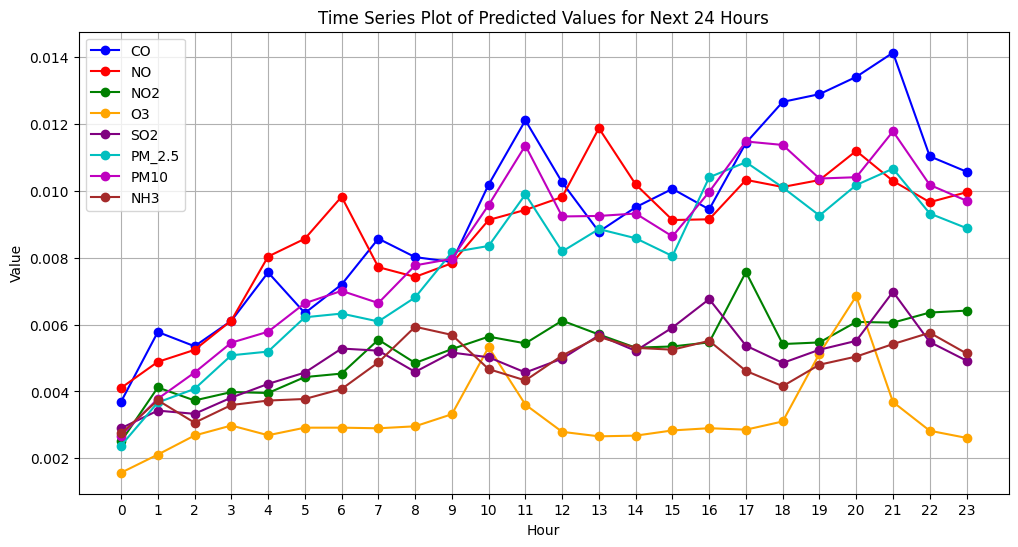

In [27]:
import matplotlib.pyplot as plt

# Example variables: replace these with your actual variables
hours = range(24)  # Replace with your actual hours or time points
mse1 = [0.00369302, 0.00577787, 0.00535179, 0.00611215, 0.00755818, 0.00634402,
0.00719665, 0.00856668, 0.00801521, 0.00787085, 0.01018335, 0.01210371,
0.01024985, 0.00877505, 0.00950584, 0.01005528, 0.00944202, 0.01142761,
0.01265431, 0.01288565, 0.01340167, 0.01412382, 0.01102822, 0.01056926]
mse2 = [0.0041059, 0.00488493, 0.00524272, 0.00611843, 0.00803243, 0.00856383,
0.00981957, 0.00771529, 0.00742462, 0.00783301, 0.00912581, 0.00942698,
0.00981138, 0.01186759, 0.01018794, 0.00912412, 0.00914548, 0.01032355,
0.01011142, 0.01031791, 0.01118938, 0.01029055, 0.00965724, 0.00995379]

mse3 = [0.00250702, 0.00411866, 0.00373141, 0.0039825, 0.00395409, 0.00442993,
0.0045344, 0.00554729, 0.00485082, 0.00526625, 0.00563856, 0.00543769,
0.0061158, 0.00570294, 0.00530833, 0.00534521, 0.00546684, 0.00756841,
0.00541736, 0.00546549, 0.00607853, 0.00605731, 0.00635845, 0.00641592]
mse4 = [0.00157159, 0.00211341, 0.0026841, 0.00298253, 0.00269186, 0.00291771,
0.00291824, 0.00289955, 0.00295901, 0.00331988, 0.0053217, 0.00360577,
0.00279381, 0.00265896, 0.00268009, 0.00283535, 0.00290244, 0.00285783,
0.00310392, 0.00513315, 0.00684998, 0.00368448, 0.00282622, 0.0026128]

mse5 = [0.00290212, 0.00342797, 0.00333155, 0.00381641, 0.00422616, 0.00456487,
0.00528262, 0.00522004, 0.00458468, 0.00516165, 0.00502269, 0.00456702,
0.00498102, 0.00567738, 0.0052149, 0.00591029, 0.00676015, 0.00536907,
0.00485224, 0.00524766, 0.00551243, 0.0069797, 0.00547849, 0.00492078]

mse6 = [0.00238463, 0.00367131, 0.00407655, 0.00508134, 0.0051919, 0.00621734,
0.00632753, 0.00609223, 0.00681039, 0.00816059, 0.00834878, 0.00989111,
0.00818315, 0.00885285, 0.00857939, 0.00804722, 0.01040055, 0.01085306,
0.01009874, 0.00925821, 0.01016872, 0.01065868, 0.0093187, 0.00888172]

mse7 = [0.00268012, 0.00378208, 0.0045652, 0.00545822, 0.00578548, 0.00663683,
0.00700684, 0.00664316, 0.0077685, 0.00796449, 0.00957194, 0.01134962,
0.0092302, 0.00924572, 0.00931791, 0.00863404, 0.00996303, 0.01147116,
0.01136746, 0.01036372, 0.01040333, 0.01177412, 0.01017379, 0.00969995]

mse8 = [0.00274457, 0.00373671, 0.00306614, 0.00359422, 0.00372844, 0.00377558,
0.00407366, 0.00486939, 0.00593413, 0.00569049, 0.00466824, 0.00432981,
0.00507434, 0.00563025, 0.00530397, 0.0052487, 0.00551238, 0.00461391,
0.00415794, 0.00480021, 0.00504301, 0.00541696, 0.00575479, 0.00513607]
# Replace with your actual MSE values for variable 2
# Add more variables as needed

# Plotting time series for multiple variables
plt.figure(figsize=(12, 6))
plt.plot(hours, mse1, marker='o', linestyle='-', color='b', label='CO')
plt.plot(hours, mse2, marker='o', linestyle='-', color='r', label='NO')
plt.plot(hours, mse3, marker='o', linestyle='-', color='g', label='NO2')
plt.plot(hours, mse4, marker='o', linestyle='-', color='orange', label='O3')
plt.plot(hours, mse5, marker='o', linestyle='-', color='purple', label='SO2')
plt.plot(hours, mse6, marker='o', linestyle='-', color='c', label='PM_2.5')
plt.plot(hours, mse7, marker='o', linestyle='-', color='m', label='PM10')
plt.plot(hours, mse8, marker='o', linestyle='-', color='brown', label='NH3')
# Add more plots for other variables
plt.xlabel('Hour')
plt.ylabel('Value')
plt.title('Time Series Plot of Predicted Values for Next 24 Hours')
plt.grid(True)
plt.xticks(hours)
plt.legend()
plt.show()



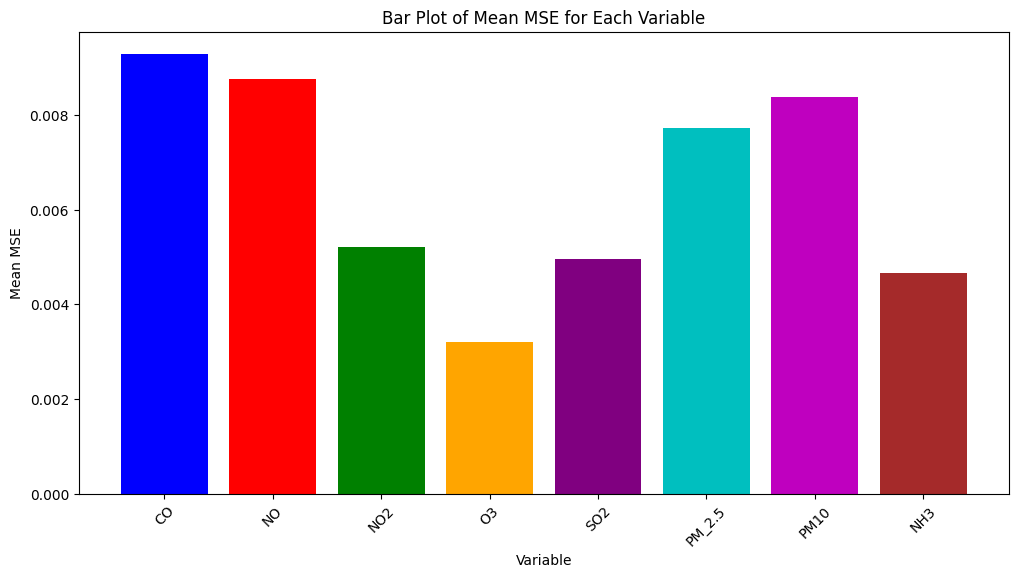

In [28]:
mean_mse = [np.mean(mse) for mse in [mse1, mse2, mse3, mse4, mse5, mse6, mse7, mse8]]

plt.figure(figsize=(12, 6))
plt.bar(['CO', 'NO', 'NO2', 'O3', 'SO2', 'PM_2.5', 'PM10', 'NH3'], mean_mse, color=['b', 'r', 'g', 'orange', 'purple', 'c', 'm', 'brown'])
plt.xlabel('Variable')
plt.ylabel('Mean MSE')
plt.title('Bar Plot of Mean MSE for Each Variable')
plt.xticks(rotation=45)
plt.show()


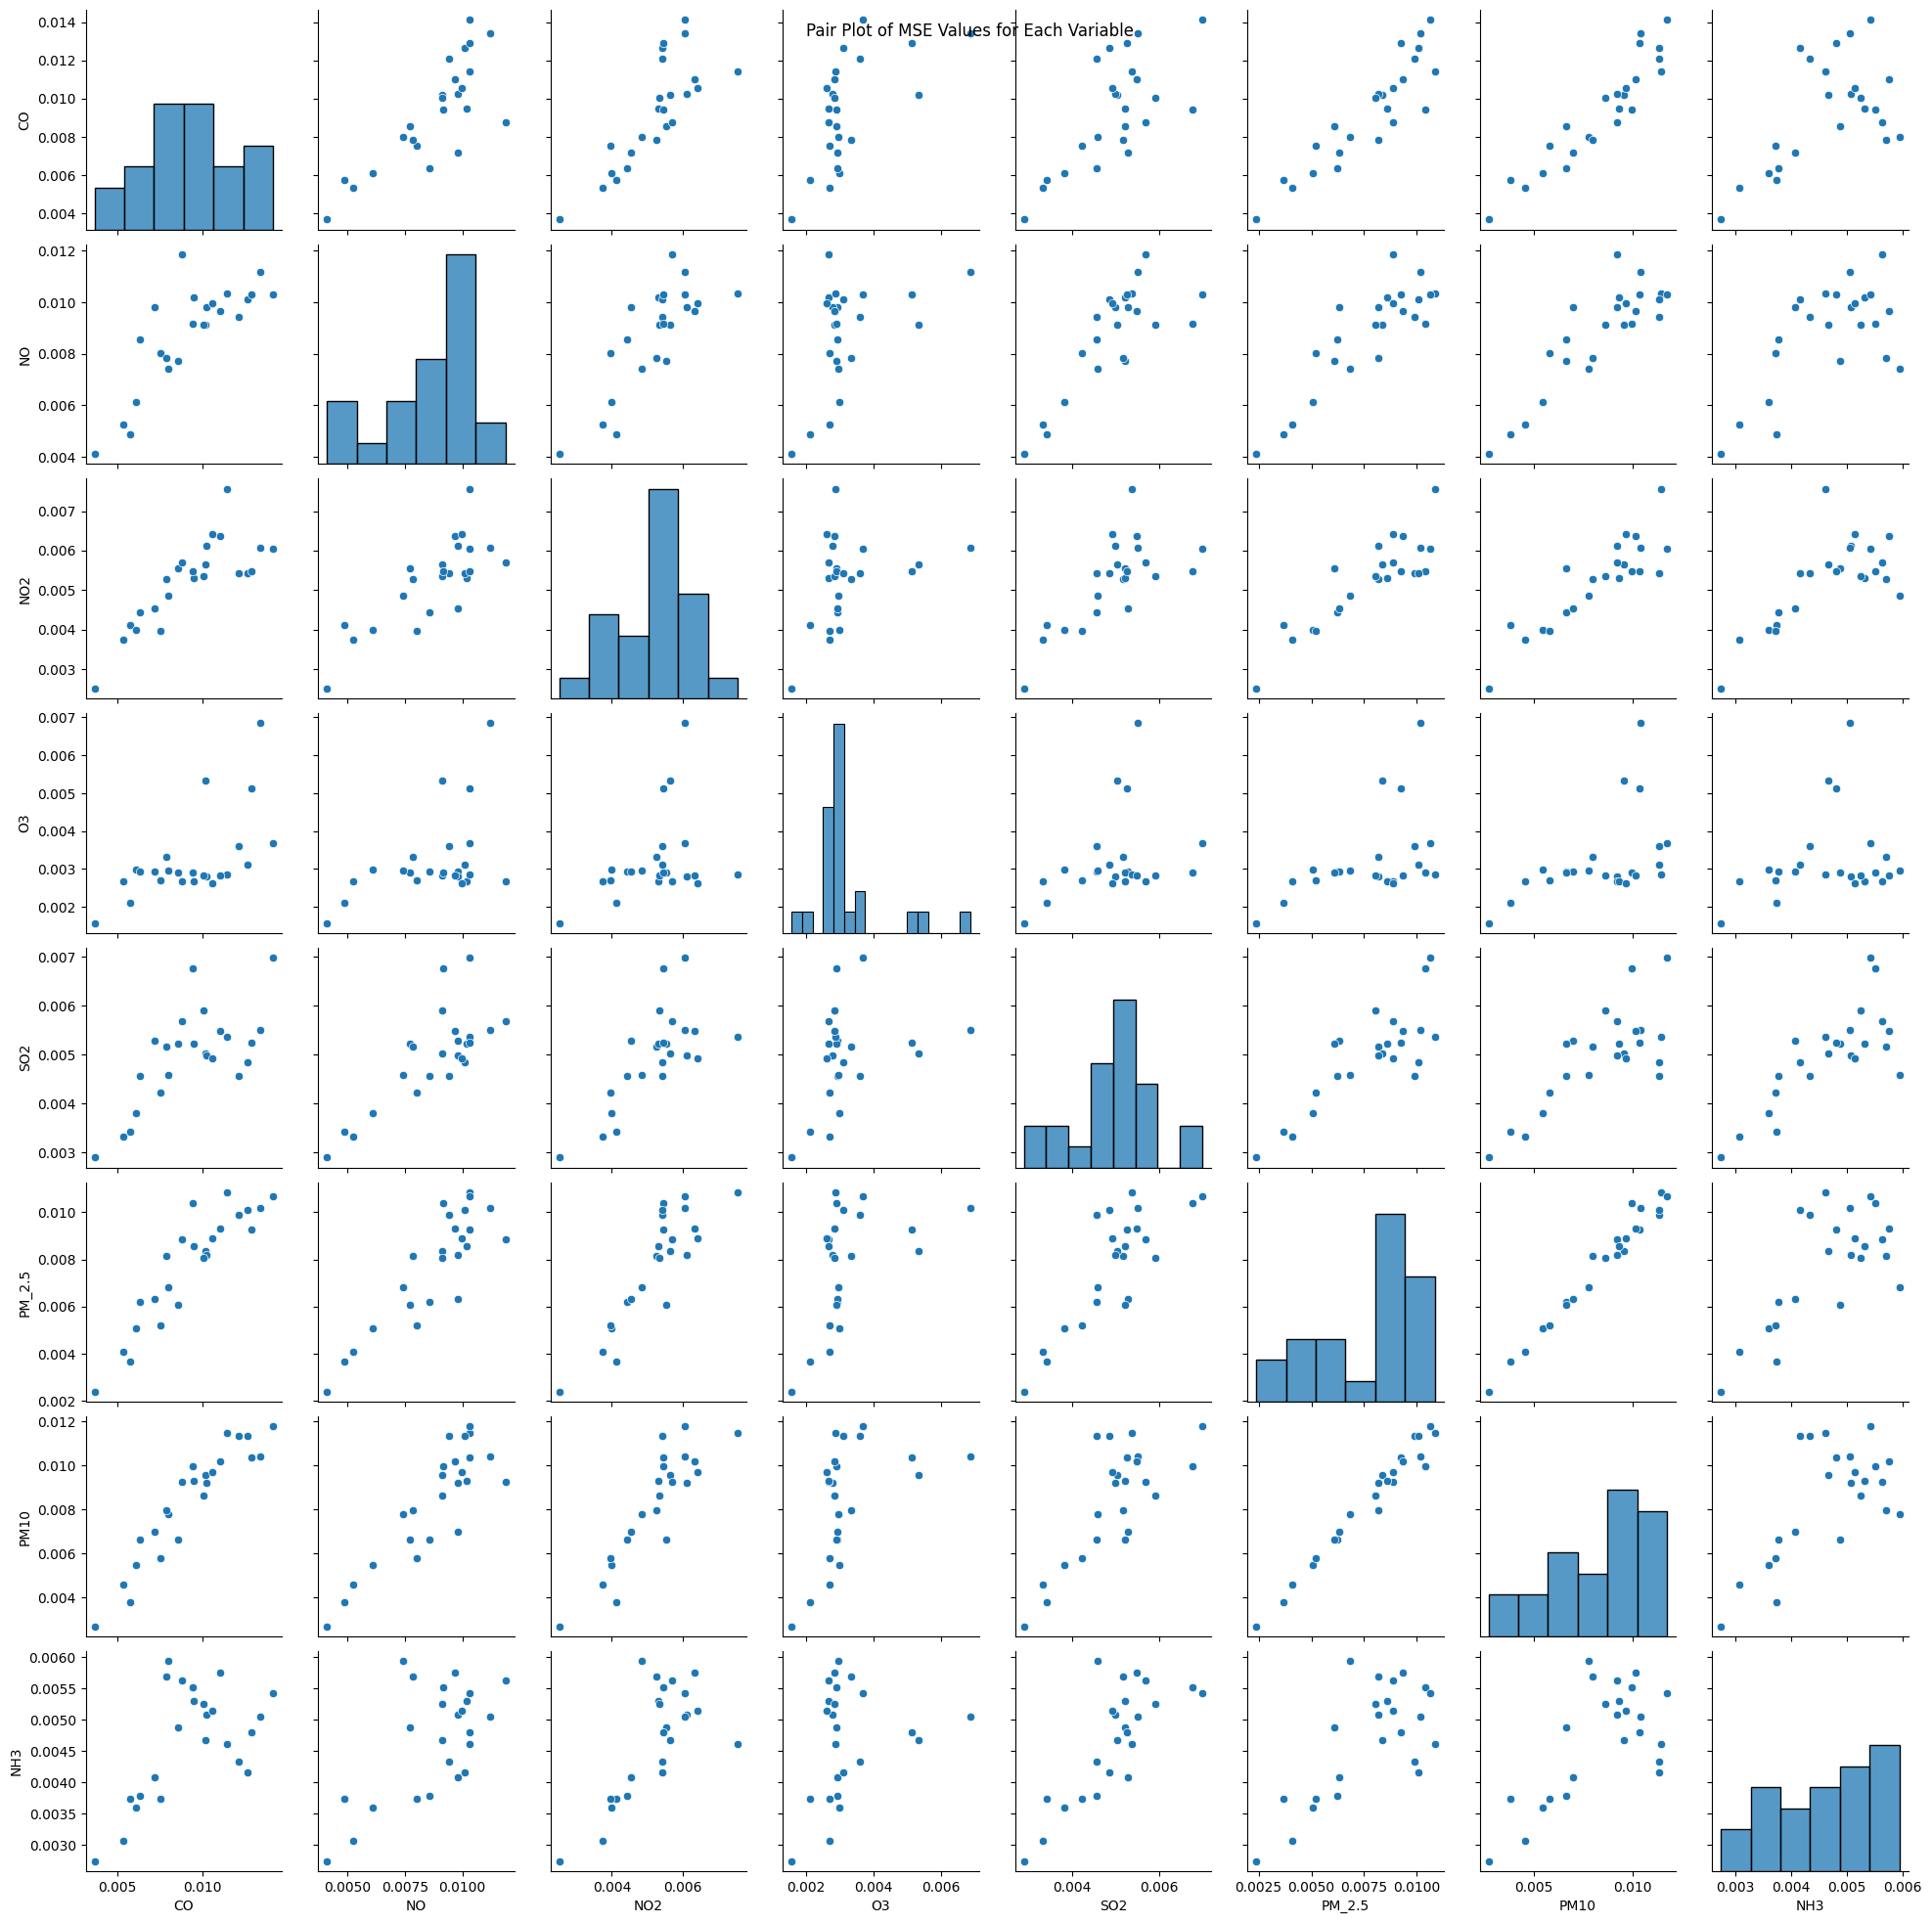

In [30]:
import seaborn as sns


mse_df = pd.DataFrame({
    'CO': mse1,
    'NO': mse2,
    'NO2': mse3,
    'O3': mse4,
    'SO2': mse5,
    'PM_2.5': mse6,
    'PM10': mse7,
    'NH3': mse8
})

sns.pairplot(mse_df)
plt.suptitle('Pair Plot of MSE Values for Each Variable')
plt.show()


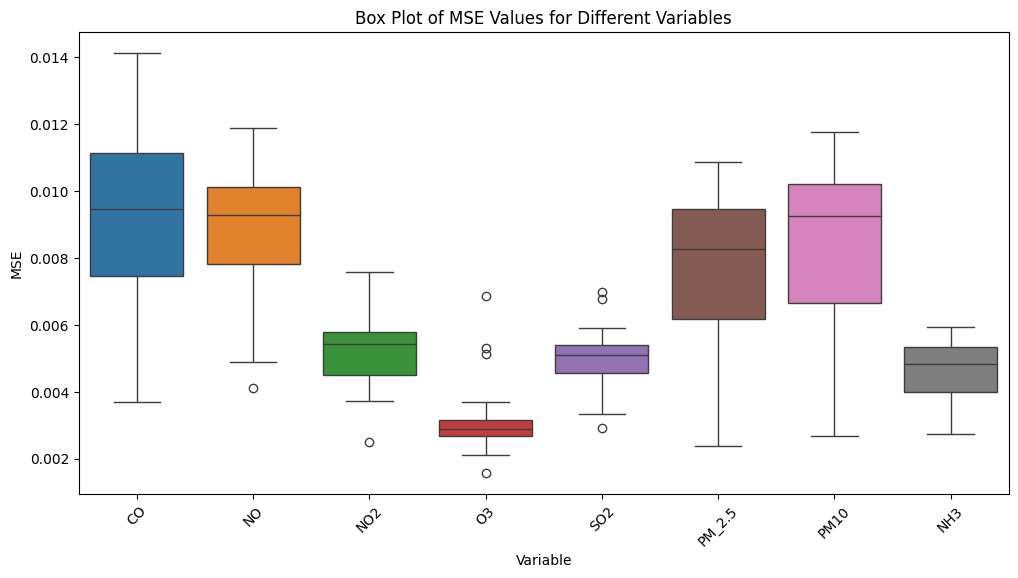

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

mse_data = pd.DataFrame({
    'CO': mse1,
    'NO': mse2,
    'NO2': mse3,
    'O3': mse4,
    'SO2': mse5,
    'PM_2.5': mse6,
    'PM10': mse7,
    'NH3': mse8
})

plt.figure(figsize=(12, 6))
sns.boxplot(data=mse_data)
plt.xlabel('Variable')
plt.ylabel('MSE')
plt.title('Box Plot of MSE Values for Different Variables')
plt.xticks(rotation=45)
plt.show()
